In [184]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [185]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [186]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [187]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [188]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [189]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [190]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [191]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [192]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
print(f'The most recent date in the dataset is {recent_date}.')

The most recent date in the dataset is 2017-08-23.


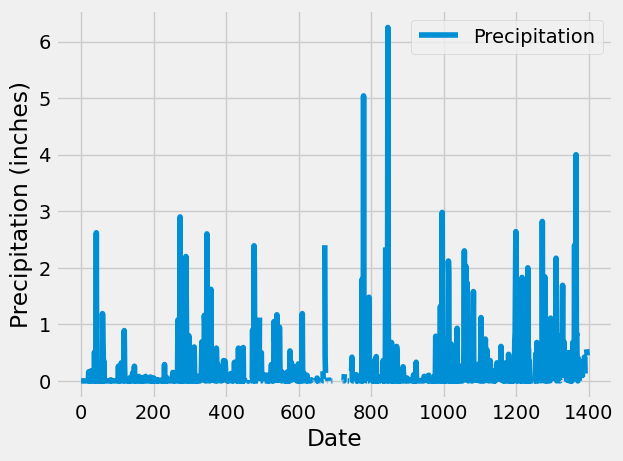

In [204]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# most recent year: see last cell

# Calculate the date one year from the last date in data set.
# one year ago: 2017-08-23 minus one year -> 2016-08-23

# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016.08.23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip)
precip_df=precip_df.rename(columns={'prcp':'Precipitation', 'date':'Date'})

# Sort the dataframe by date
precipt_df = precip_df.sort_values(['Date'], ascending=True)
precipt_df = precip_df.set_index('Date').dropna()

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot()
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.show()

In [194]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,1267.000000
mean,0.165927
std,0.453913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.105000
max,6.250000


# Exploratory Station Analysis

In [195]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station).count()
print(f'There are {station_count} stations.')

There are 9 stations.


In [196]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [197]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 1.0, 'Temperatures at Station USC00519281 for 08.23.2016 to 08.23.2017')

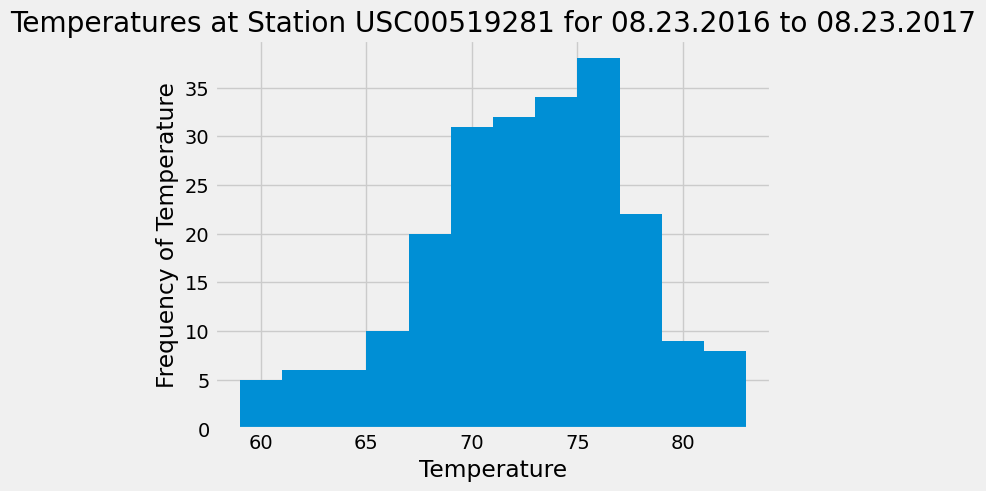

In [200]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_mon_temp = session.query(Measurement.tobs).filter(Measurement.station == most_active_stations[0][0]).filter(Measurement.date >= "2016.08.23").all()
temps = []
for temp in twelve_mon_temp:
    temps.append(temp[0])
plt.hist(temps, bins=12)
plt.ylabel('Frequency of Temperature')
plt.xlabel('Temperature')
plt.title('Temperatures at Station USC00519281 for 08.23.2016 to 08.23.2017')

# Close Session

In [199]:
# Close Session
session.close()